# Tutorial: Token-to-State Routing in NSM

This tutorial explains the **Token-to-State Routing** mechanism in Neural State Machines (NSM), which determines how input tokens interact with state nodes.

## Learning Objectives

By the end of this tutorial, you will understand:

1. The concept of routing in NSM
2. How tokens determine which states to interact with
3. The efficiency benefits of selective routing
4. A simple implementation of routing mechanism

## What is Token-to-State Routing?

In traditional Transformers, each token attends to all other tokens, leading to O(n²) complexity. In NSM, tokens use a **routing mechanism** to selectively attend to only the most relevant state nodes.

This approach:
- Reduces computational complexity
- Enables focused processing
- Mimics goal-directed attention in biological systems

## How Routing Works

The routing process involves:

1. **Compatibility Scoring**: Compute similarity between tokens and states
2. **Attention Weights**: Determine which states are most relevant
3. **Selective Interaction**: Tokens interact only with top-k states

Let's implement a simple example to see this in action.

In [1]:
# Import necessary libraries
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# For better visualization
import seaborn as sns
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Define parameters
batch_size = 1
seq_length = 8  # Number of tokens
token_dim = 16
num_states = 5
state_dim = 16

# Create random token embeddings
tokens = torch.randn(batch_size, seq_length, token_dim)

# Create random state embeddings
states = torch.randn(batch_size, num_states, state_dim)

print(f"Token embeddings shape: {tokens.shape}")
print(f"State embeddings shape: {states.shape}")

Token embeddings shape: torch.Size([1, 8, 16])
State embeddings shape: torch.Size([1, 5, 16])


In [3]:
# Simple routing mechanism (attention-based)

# Compute compatibility scores (dot product)
# [B, N, D] x [B, D, S] -> [B, N, S]
compatibility = torch.bmm(tokens, states.transpose(1, 2))

# Apply softmax to get attention weights
routing_weights = F.softmax(compatibility, dim=-1)

print(f"Compatibility scores shape: {compatibility.shape}")
print(f"Routing weights shape: {routing_weights.shape}")
print("\nRouting weights for first token:")
print(routing_weights[0, 0, :])
print(f"\nSum of weights for first token: {routing_weights[0, 0, :].sum().item()}")

Compatibility scores shape: torch.Size([1, 8, 5])
Routing weights shape: torch.Size([1, 8, 5])

Routing weights for first token:
tensor([2.1630e-03, 2.0740e-04, 9.9676e-01, 8.7137e-04, 8.6210e-08])

Sum of weights for first token: 1.0000001192092896


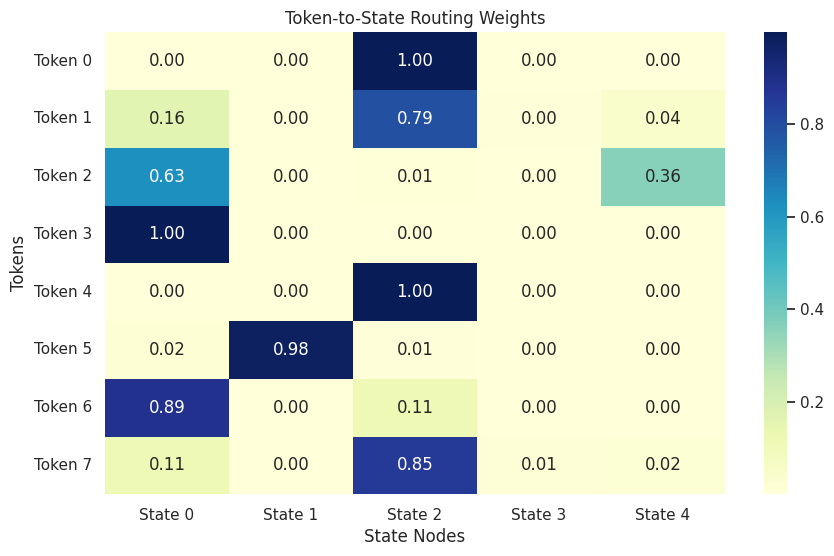

In [4]:
# Visualize routing weights

# Convert to numpy for plotting
weights_np = routing_weights[0].detach().numpy()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weights_np, annot=True, cmap="YlGnBu", fmt=".2f",
            xticklabels=[f'State {i}' for i in range(num_states)],
            yticklabels=[f'Token {i}' for i in range(seq_length)])
plt.title('Token-to-State Routing Weights')
plt.xlabel('State Nodes')
plt.ylabel('Tokens')
plt.show()

In [5]:
# Example of top-k routing (for efficiency)

# Get top-2 states for each token
topk_values, topk_indices = torch.topk(routing_weights, k=2, dim=-1)

print("Top-2 states for each token:")
for i in range(seq_length):
    print(f"Token {i}: States {topk_indices[0, i].tolist()} with weights {topk_values[0, i].tolist()}")

# This shows how each token can selectively interact with only the most relevant states
# instead of all states, improving efficiency.

Top-2 states for each token:
Token 0: States [2, 0] with weights [0.9967581629753113, 0.002163037657737732]
Token 1: States [2, 0] with weights [0.7903540134429932, 0.16026031970977783]
Token 2: States [0, 4] with weights [0.6267377138137817, 0.36186158657073975]
Token 3: States [0, 3] with weights [0.9987339377403259, 0.0004797430301550776]
Token 4: States [2, 3] with weights [0.996893048286438, 0.001852807472459972]
Token 5: States [1, 0] with weights [0.9778939485549927, 0.015847381204366684]
Token 6: States [0, 2] with weights [0.8887832164764404, 0.11110367625951767]
Token 7: States [2, 0] with weights [0.8546110987663269, 0.11012616753578186]


## Key Takeaways

1. **Selective Attention**: Tokens attend only to relevant states, not all states.
2. **Efficiency**: This selective routing reduces computational complexity from O(n×s) to O(n×k) where k≪s.
3. **Biological Plausibility**: Mimics how biological systems focus attention on relevant memory fragments.

## Next Tutorial

In the next tutorial, we'll explore **Hybrid Attention**, which combines local and global attention mechanisms.

See `notebooks/tutorials/hybrid_attention.ipynb` for the next part.